In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from matplotlib.patches import Polygon 
% matplotlib inline

# Visualize data

(500, 2)


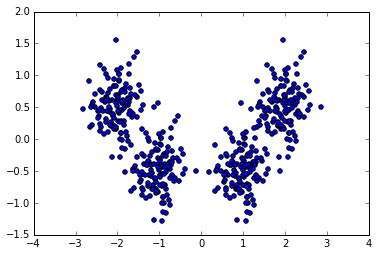

In [59]:
X = np.loadtxt("cluster.dat").T
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

# 10.1 K-means Clustering

Converged at 3
Converged at 4
Converged at 9
Converged at 5
Converged at 12
Converged at 7
Converged at 14


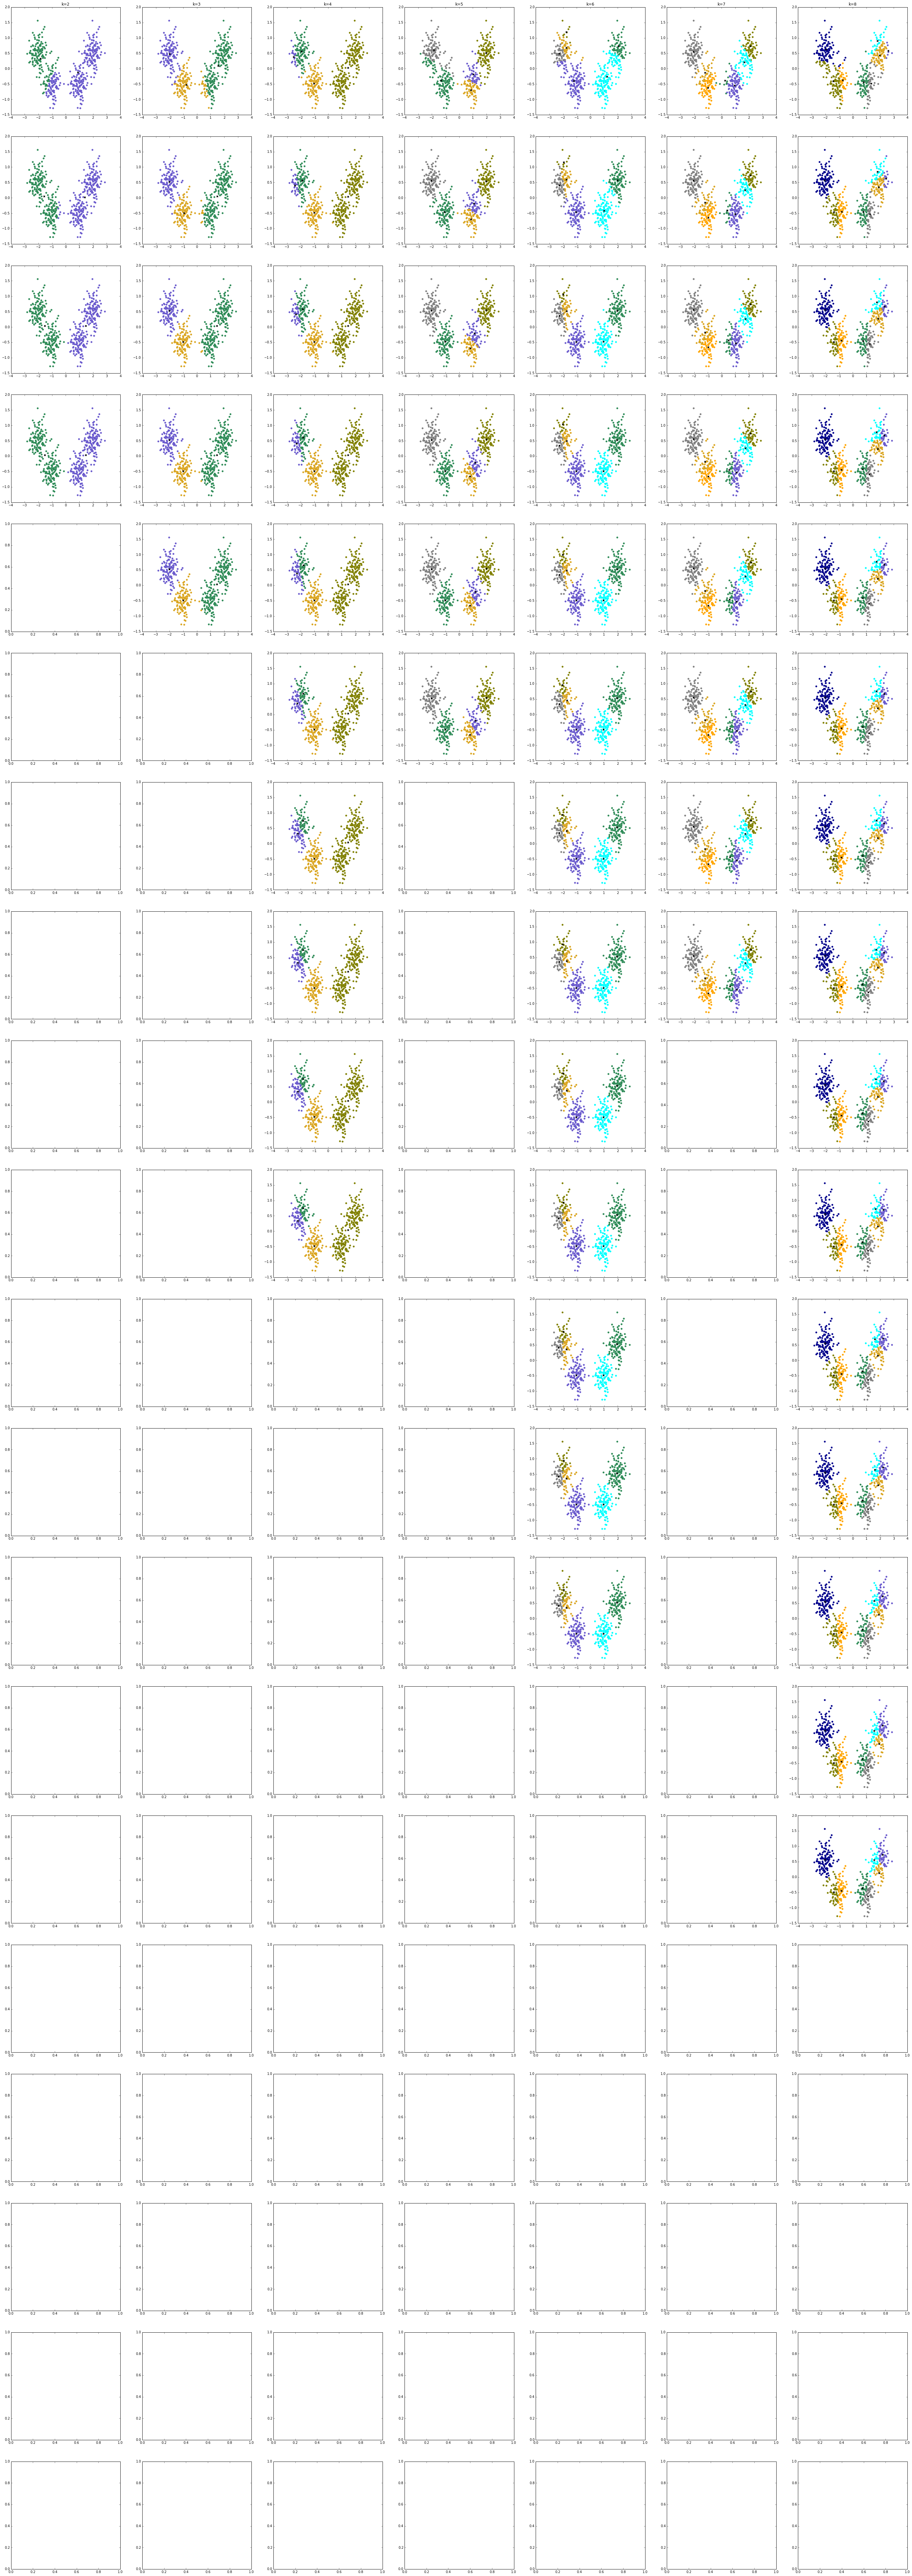

In [148]:
#Write a program that implements the standard version of K-means clustering and partitions the given data set into K clusters. 
#Repeat the clustering procedure for different initializations of the prototypes and K = 2, 3, 4, 5, 6, 7, 8. 


#Set the maximum number of iterations tmax, e.g. 5
tmax = 20

#ks = [2, 3, 4, 5, 6, 7, 8]
ks = [2, 3, 4, 5, 6, 7, 8]

p = X.shape[0]
d = X.shape[1]

Es = np.zeros((tmax, len(ks)))

#Colors for plotting
colors=["seagreen", "slateblue", "goldenrod", "olive", "gray", "cyan", "orange", "darkblue"]

f, axarr = plt.subplots(tmax, len(ks))
f.set_size_inches(len(ks)*7, tmax*7, forward=False)

for K, k in enumerate(ks):
    #Initialization
    #w is kxd
    #Set the initial prototypes wq randomly around the data set mean
    '''
    Xm = np.mean(X, axis=0).reshape(1,-1)
    #random 0-1
    w = (np.random.rand(k,X.shape[1])-.5)*2
    #scale to min, max
    Xdiff = (np.max(X, axis=0) - np.min(X, axis=0)).reshape(1,-1)
    w = np.multiply(w, Xdiff) - Xm
    '''
    #pick one point for each initial mean
    w = np.random.permutation(X)[0:k,:]
    
    #Optimization
    t = 0
    for t in range(tmax):
    
        #assign all datapoints to their closest prototype
        #compute distance matrix squared, pxk
        lones = np.ones((p,1))
        rones = np.ones((1,k))
        DD =  np.dot(np.sum(np.power(X, 2),axis=1).reshape(-1,1), rones)\
                 +np.dot(lones, np.sum(np.power(w, 2),axis=1).reshape(-1,1).T)\
                 -2*np.dot(X,w.T)
        #compute distance matrix, pxk
        D =  np.sqrt(DD)
        #print( D )
        #find k-valued assignment matrix, certain assignment, always only in one cluster
        assignments = np.argmin(D, axis=1).reshape(-1,1)
        #find binary assignment matrix
        m = np.zeros( (p, k) )

        wold = w.copy()
        for ki in range(k):
            #print( X[assignments==K] )
            Xkx = X[:,0].reshape(-1,1)[assignments==ki].reshape(-1,1)
            Xky = X[:,1].reshape(-1,1)[assignments==ki].reshape(-1,1)
            
            if len(Xkx)>0:
                w[ki,0] = np.mean(Xkx)
                w[ki,1] = np.mean(Xky)
                
            m[:,ki] = (assignments==ki).flatten()
            
            axarr[t, K].scatter(Xkx, Xky, color=colors[ki])
        #plt.scatter(Xm[:,0], Xm[:,1], marker="x", color="red")
        axarr[0, K].set_title("k="+str(k))
        axarr[t, K].scatter(w[:,0], w[:,1], marker="x", color="black", linewidth=2)
        
        #compute errors, error always decreases for increasing k
        #use previous center (wold) distances (even though we've moved them)
        #m: pxk, DD: pxk
        Es[t, K] = (1./(2.*p))*(np.sum(np.dot(m, DD.T)))
        
        if np.sum(w-wold) == 0:
            print("Converged at "+str(t))
            break
plt.show()

#From an optimal solution, permuting the clusters yields another optimal solution

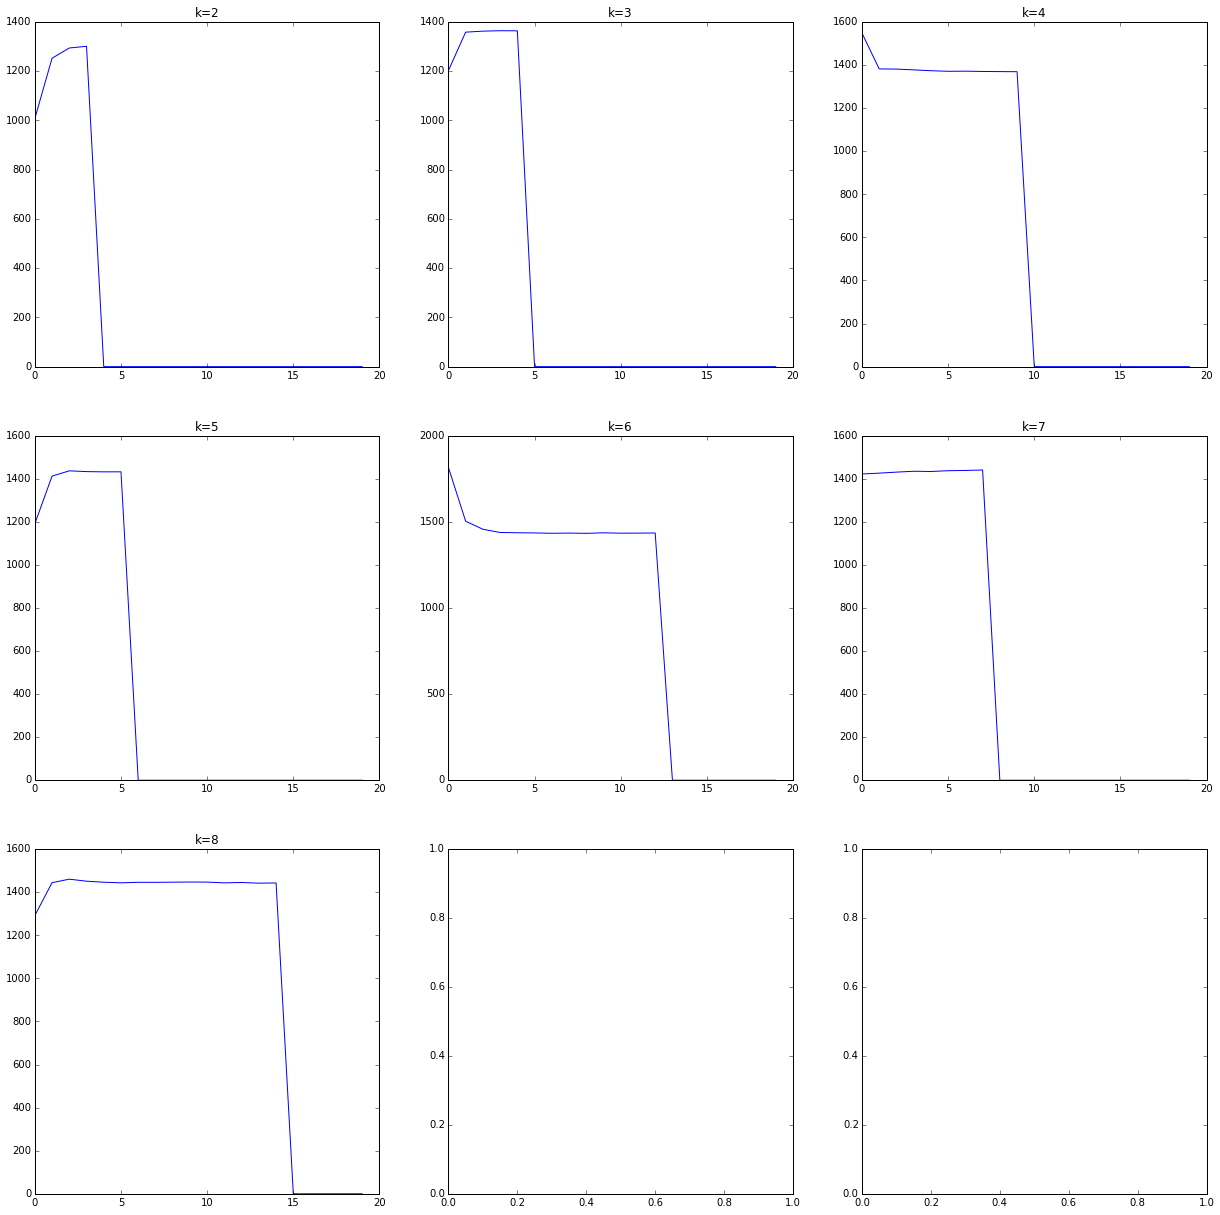

In [149]:
#plot errors
cols = np.min((3))
rows = int(np.ceil(len(ks)/cols))

f, axarr = plt.subplots(rows, cols)
f.set_size_inches(cols*7, rows*7, forward=False)
for r in range(rows):
    for c in range(int(np.min((cols,len(ks)-r*cols)))):
        k=cols*r+c
        #print(r, c, k)
        axarr[r, c].plot(range(tmax), Es[:,k])
        axarr[r, c].set_title("k="+str(ks[k]))
plt.show()

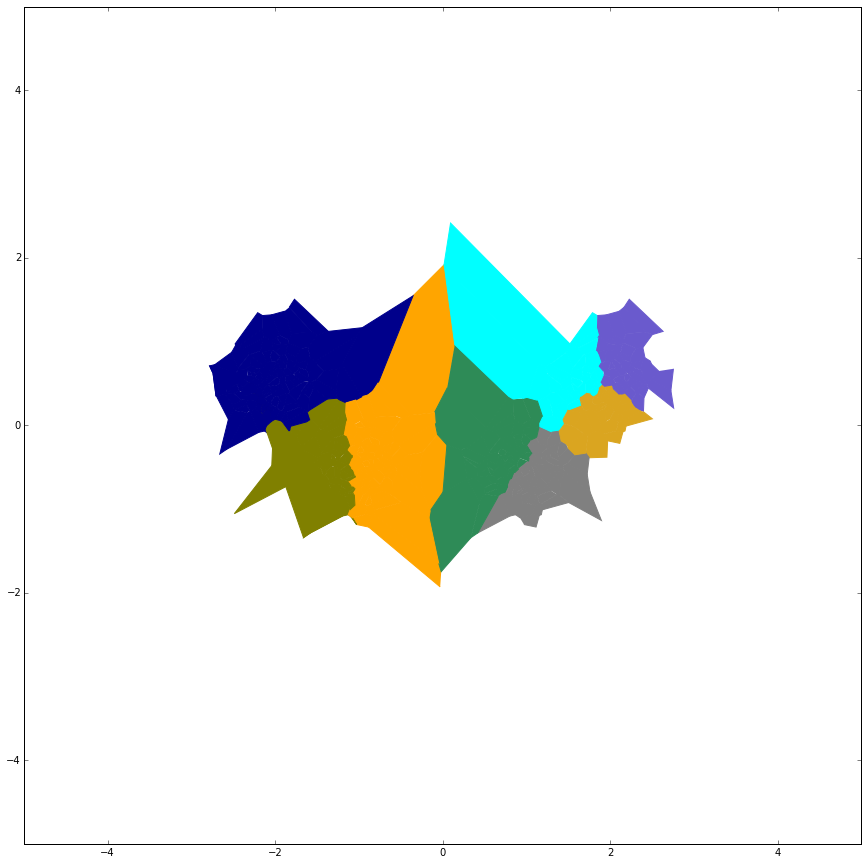

In [235]:
#Voronoi(points, furthest_site=False, incremental=False, qhull_options=None) 
voronoid = Voronoi(X)
#print( voronoid.point_region.shape )
region_ks = np.zeros(len(voronoid.regions))
for P in range(len(voronoid.point_region)):
    point = P
    region = voronoid.point_region[point]
    region_ks[region] = assignments[point]
#print( voronoid.vertices.shape )
#print( voronoid.point_region.shape )
#print( len(voronoid.regions) )
f = plt.figure()
f.set_size_inches(15, 15, forward=False)
ax = f.add_subplot(111)
#ax.set_xlimit([-10,10])

plt.xlim([-5,5])
plt.ylim([-5,5])

for R in range(1, len(voronoid.regions)):
    if np.min((voronoid.vertices[voronoid.regions[R]]))>=np.min(X) and np.max((voronoid.vertices[voronoid.regions[R]]))<np.max(X):
        #print( R-1,voronoid.vertices[region] )
        #print(voronoid.point_region[R-1]-1)
        #k = assignments[voronoid.point_region[R-1]-1]
        #print()
        #ax.add_patch(Polygon(voronoid.vertices[voronoid.regions[R]], closed=False, edgecolor='k', facecolor=colors[int(region_ks[R])]))
        ax.add_patch(Polygon(voronoid.vertices[voronoid.regions[R]], closed=False, color=colors[int(region_ks[R])]))
        #ax.scatter(voronoid.vertices[region][:,0], voronoid.vertices[region][:,1])
        
#plt.scatter(voronoid.vertices[:,0], voronoid.vertices[:,1])
#plt.add_patch()
#voronoi_plot_2d(vor)
plt.show() 

# 10.2 Online K-means Clustering